In [1]:
import os
import random
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.models import densenet121
from tqdm import tqdm
import matplotlib.pyplot as plt

C:\Users\zero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

Using device: cuda

Initializing dataset
Looking for images in: /content/drive/MyDrive/Lawn_Canopy.v2i.coco-segmentation/train

Dataset Summary:
Total images in COCO: 2556
Total annotations: 5772
Images with annotations: 2251

Dataset splits:
Training: 1575 images
Validation: 337 images
Testing: 339 images


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 59.2MB/s]
Validation: 100%|██████████| 6/6 [01:13<00:00, 12.20s/it]


Epoch 1/200:
Training Loss: 0.6549
Validation Loss: 0.6779
New best model saved! Validation Loss: 0.6779


Validation: 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]


Epoch 2/200:
Training Loss: 0.5793
Validation Loss: 0.5749
New best model saved! Validation Loss: 0.5749


Validation: 100%|██████████| 6/6 [00:03<00:00,  1.67it/s]


Epoch 3/200:
Training Loss: 0.5366
Validation Loss: 0.5128
New best model saved! Validation Loss: 0.5128


Validation: 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]


Epoch 4/200:
Training Loss: 0.4969
Validation Loss: 0.5009
New best model saved! Validation Loss: 0.5009


Validation: 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

Epoch 5/200:
Training Loss: 0.4767
Validation Loss: 0.5136


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Lawn_Canopy.v2i.coco-segmentation/validation_viz/epoch_5_predictions3.png'

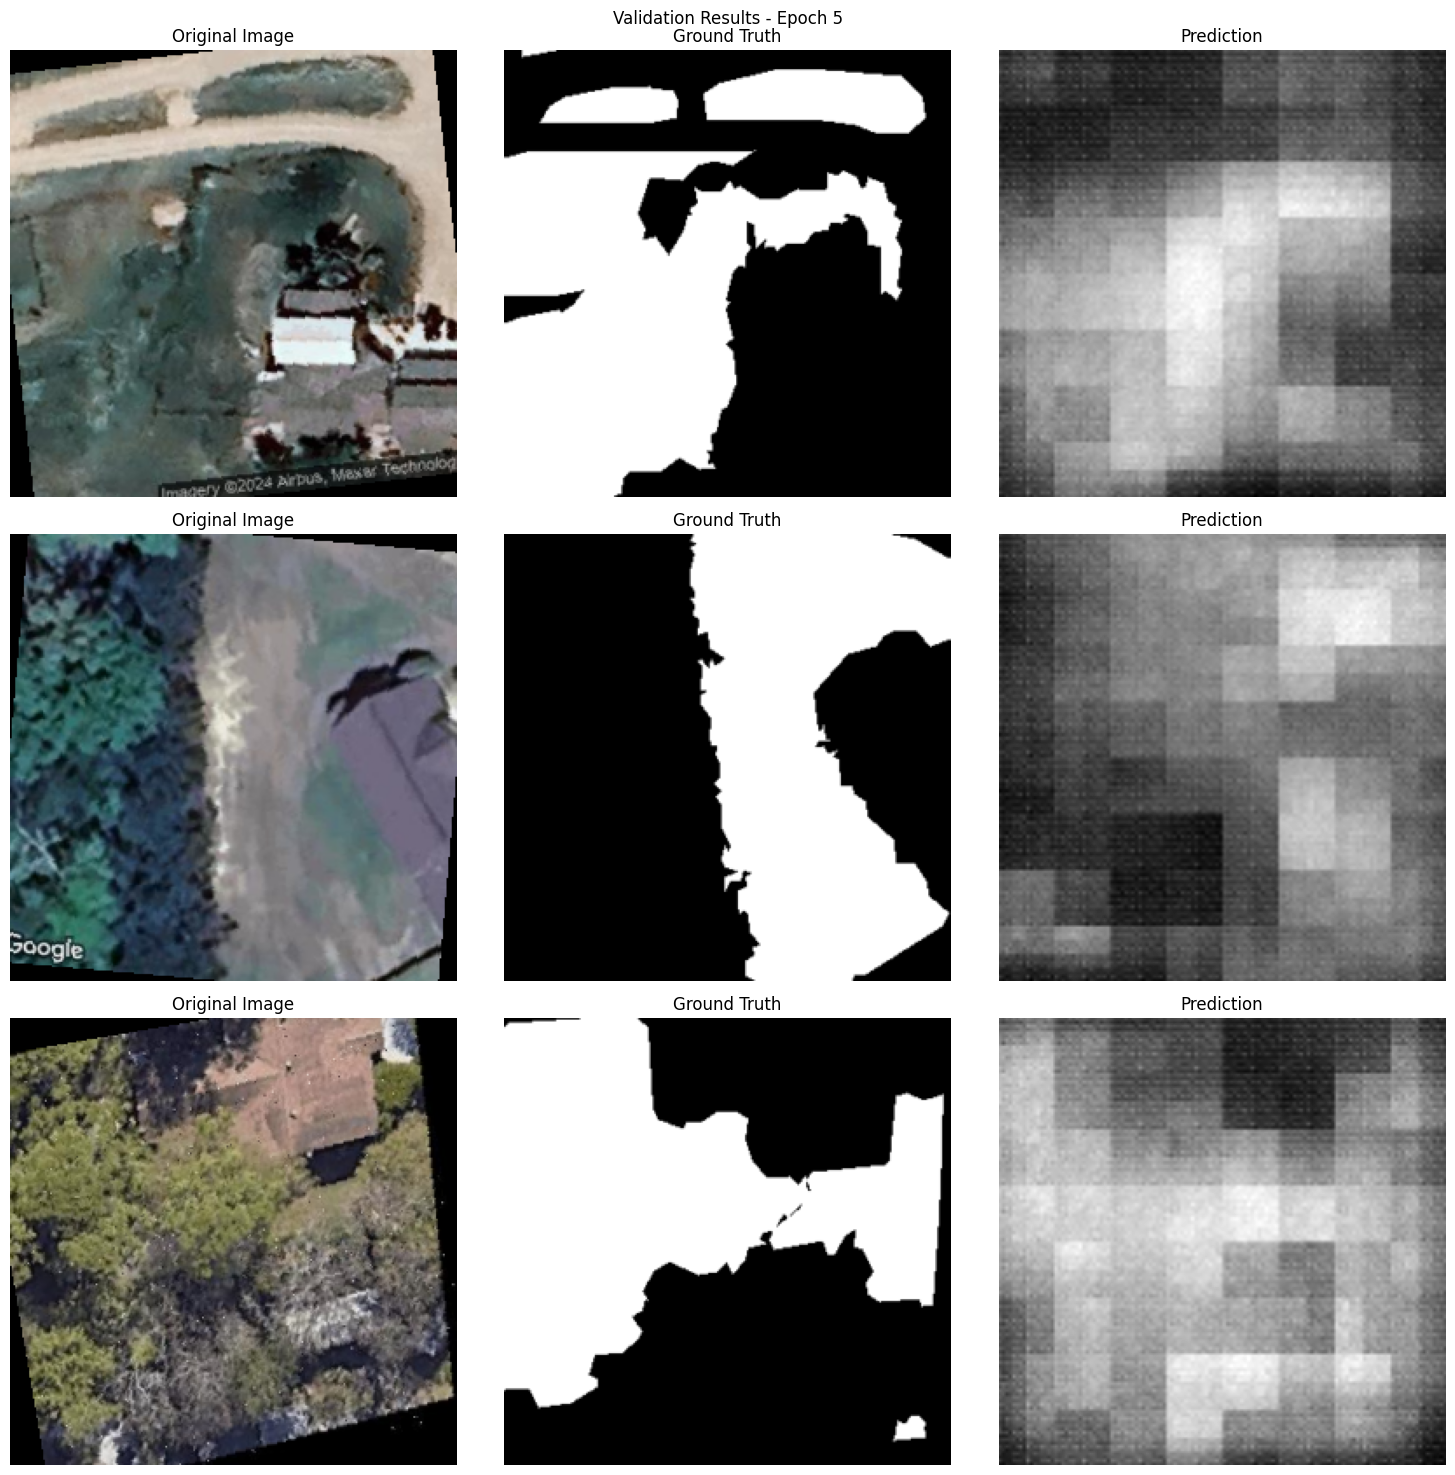

In [ ]:
# import os
# import json
# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset, DataLoader, random_split
# from torchvision.models import densenet121
# from torchvision import transforms
# from PIL import Image, ImageDraw
# from tqdm import tqdm
# import matplotlib.pyplot as plt
# import numpy as np

# class LawnSegmentationDataset(Dataset):
#     def __init__(self, img_dir, annotation_file, transform=None):
#         self.img_dir = img_dir
#         self.transform = transform

#         print(f"\nInitializing dataset")
#         print(f"Looking for images in: {self.img_dir}")

#         if not os.path.exists(self.img_dir):
#             raise FileNotFoundError(f"Directory not found: {self.img_dir}")

#         with open(annotation_file, 'r') as f:
#             coco = json.load(f)

#         self.image_id_to_filename = {
#             img['id']: img['file_name'] for img in coco['images']
#         }

#         self.image_id_to_size = {
#             img['id']: (img['height'], img['width']) for img in coco['images']
#         }

#         self.image_id_to_annotations = {}
#         for ann in coco['annotations']:
#             image_id = ann['image_id']
#             if image_id not in self.image_id_to_annotations:
#                 self.image_id_to_annotations[image_id] = []
#             self.image_id_to_annotations[image_id].append(ann)

#         self.image_ids = list(self.image_id_to_annotations.keys())

#         print(f"\nDataset Summary:")
#         print(f"Total images in COCO: {len(coco['images'])}")
#         print(f"Total annotations: {len(coco['annotations'])}")
#         print(f"Images with annotations: {len(self.image_ids)}")

#     def __len__(self):
#         return len(self.image_ids)

#     def get_original_image_and_mask(self, idx):
#         """Get original image and mask without transforms"""
#         image_id = self.image_ids[idx]
#         filename = self.image_id_to_filename[image_id]
#         img_path = os.path.join(self.img_dir, filename)

#         image = Image.open(img_path).convert('RGB')

#         annotations = self.image_id_to_annotations[image_id]
#         segmentations = [ann['segmentation'][0] for ann in annotations]
#         mask = self.create_mask_from_segmentation(segmentations, self.image_id_to_size[image_id])

#         return image, mask

#     def create_mask_from_segmentation(self, segmentations, image_size):
#         mask = Image.new('L', (image_size[1], image_size[0]), 0)
#         draw = ImageDraw.Draw(mask)

#         for segmentation in segmentations:
#             polygon = []
#             for i in range(0, len(segmentation), 2):
#                 polygon.append((segmentation[i], segmentation[i+1]))
#             draw.polygon(polygon, fill=255)

#         return mask

#     def __getitem__(self, idx):
#         try:
#             image_id = self.image_ids[idx]
#             filename = self.image_id_to_filename[image_id]
#             img_path = os.path.join(self.img_dir, filename)

#             image = Image.open(img_path).convert('RGB')

#             annotations = self.image_id_to_annotations[image_id]
#             segmentations = [ann['segmentation'][0] for ann in annotations]
#             mask = self.create_mask_from_segmentation(segmentations, self.image_id_to_size[image_id])

#             if self.transform:
#                 image = self.transform['image'](image)
#                 if 'mask' in self.transform:
#                     mask = self.transform['mask'](mask)
#                 else:
#                     mask = transforms.Compose([
#                         transforms.Resize((256, 256)),
#                         transforms.ToTensor()
#                     ])(mask)

#             return image, mask

#         except Exception as e:
#             print(f"\nError processing image_id: {image_id}")
#             print(f"Filename: {filename}")
#             print(f"Error: {str(e)}")
#             raise e

# class SelfAttention(nn.Module):
#     def __init__(self, in_channels):
#         super().__init__()
#         self.query = nn.Conv2d(in_channels, in_channels//8, 1)
#         self.key = nn.Conv2d(in_channels, in_channels//8, 1)
#         self.value = nn.Conv2d(in_channels, in_channels, 1)
#         self.gamma = nn.Parameter(torch.zeros(1))

#     def forward(self, x):
#         batch_size, C, H, W = x.size()
#         proj_query = self.query(x).view(batch_size, -1, H*W).permute(0, 2, 1)
#         proj_key = self.key(x).view(batch_size, -1, H*W)
#         attention = torch.softmax(torch.bmm(proj_query, proj_key), dim=-1)
#         proj_value = self.value(x).view(batch_size, -1, H*W)
#         out = torch.bmm(proj_value, attention.permute(0, 2, 1))
#         return self.gamma * out.view(batch_size, C, H, W) + x

# class DenseNetUNet(nn.Module):
#     def __init__(self, num_classes=1):
#         super().__init__()

#         densenet = densenet121(weights='IMAGENET1K_V1')

#         self.encoder1 = nn.Sequential(*list(densenet.features)[:4])
#         self.encoder2 = nn.Sequential(*list(densenet.features)[4:6])
#         self.encoder3 = nn.Sequential(*list(densenet.features)[6:8])
#         self.encoder4 = nn.Sequential(*list(densenet.features)[8:10])

#         for param in self.encoder1.parameters():
#             param.requires_grad = False

#         self.attention = SelfAttention(512)

#         self.decoder4 = nn.Sequential(
#             nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
#             nn.BatchNorm2d(256),
#             nn.ReLU(inplace=True)
#         )

#         self.decoder3 = nn.Sequential(
#             nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
#             nn.BatchNorm2d(128),
#             nn.ReLU(inplace=True)
#         )

#         self.decoder2 = nn.Sequential(
#             nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
#             nn.BatchNorm2d(64),
#             nn.ReLU(inplace=True)
#         )

#         self.decoder1 = nn.Sequential(
#             nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
#             nn.BatchNorm2d(32),
#             nn.ReLU(inplace=True)
#         )

#         self.final = nn.Sequential(
#             nn.Conv2d(32, num_classes, kernel_size=1),
#             nn.Upsample(size=(256, 256), mode='bilinear', align_corners=True)
#         )

#     def forward(self, x):
#         e1 = self.encoder1(x)
#         e2 = self.encoder2(e1)
#         e3 = self.encoder3(e2)
#         e4 = self.encoder4(e3)

#         attended = self.attention(e4)

#         d4 = self.decoder4(attended)
#         d3 = self.decoder3(d4)
#         d2 = self.decoder2(d3)
#         d1 = self.decoder1(d2)

#         out = self.final(d1)
#         return torch.sigmoid(out)

# def visualize_prediction(model, dataset, idx, device, epoch):
#     """Visualize model prediction on a single image"""
#     model.eval()

#     # Get the original dataset if it's a subset
#     if hasattr(dataset, 'dataset'):
#         # For subset, adjust the index
#         actual_idx = dataset.indices[idx]
#         original_dataset = dataset.dataset
#     else:
#         actual_idx = idx
#         original_dataset = dataset

#     # Get original image and mask
#     original_image, original_mask = original_dataset.get_original_image_and_mask(actual_idx)

#     # Apply transforms for model input
#     transform = original_dataset.transform
#     input_image = transform['image'](original_image).unsqueeze(0).to(device)

#     # Get model prediction
#     with torch.no_grad():
#         pred_mask = model(input_image)
#         pred_mask = pred_mask.squeeze().cpu().numpy()

#     # Create figure
#     plt.figure(figsize=(15, 5))

#     # Plot original image
#     plt.subplot(1, 3, 1)
#     plt.imshow(original_image)
#     plt.title('Original Image')
#     plt.axis('off')

#     # Plot ground truth mask
#     plt.subplot(1, 3, 2)
#     plt.imshow(original_mask, cmap='gray')
#     plt.title('Ground Truth Mask')
#     plt.axis('off')

#     # Plot predicted mask
#     plt.subplot(1, 3, 3)
#     plt.imshow(pred_mask, cmap='gray')
#     plt.title('Predicted Mask')
#     plt.axis('off')

#     plt.suptitle(f'Epoch {epoch}')
#     plt.savefig(f'validation_viz_epoch_{epoch}.png')
#     plt.close()

# def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
#     best_val_loss = float('inf')
#     train_losses = []
#     val_losses = []

#     # Get a fixed validation image for visualization
#     val_dataset = val_loader.dataset
#     viz_idx = 0  # Use first validation image

#     for epoch in range(num_epochs):
#         model.train()
#         train_loss = 0.0

#         for images, masks in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
#             images = images.to(device)
#             masks = masks.to(device)

#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, masks)
#             loss.backward()
#             optimizer.step()

#             train_loss += loss.item()

#         avg_train_loss = train_loss / len(train_loader)
#         train_losses.append(avg_train_loss)

#         model.eval()
#         val_loss = 0.0

#         with torch.no_grad():
#             for images, masks in tqdm(val_loader, desc='Validation'):
#                 images = images.to(device)
#                 masks = masks.to(device)

#                 outputs = model(images)
#                 loss = criterion(outputs, masks)
#                 val_loss += loss.item()

#         avg_val_loss = val_loss / len(val_loader)
#         val_losses.append(avg_val_loss)

#         print(f'Epoch {epoch+1}/{num_epochs}:')
#         print(f'Training Loss: {avg_train_loss:.4f}')
#         print(f'Validation Loss: {avg_val_loss:.4f}')

#         # Visualize prediction every 5 epochs
#         if (epoch + 1) % 5 == 0:
#             visualize_prediction(model, val_dataset, viz_idx, device, epoch + 1)

#         if avg_val_loss < best_val_loss:
#             best_val_loss = avg_val_loss
#             torch.save(model.state_dict(), 'best_lawn_segmentation_model.pth')

#     return train_losses, val_losses

# def create_data_loaders(img_dir, annotation_file, batch_size=16, train_split=0.7, val_split=0.15):
#     transform = {
#         'image': transforms.Compose([
#             transforms.Resize((256, 256)),
#             transforms.RandomHorizontalFlip(),
#             transforms.RandomRotation(10),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                std=[0.229, 0.224, 0.225])
#         ]),
#         'mask': transforms.Compose([
#             transforms.Resize((256, 256)),
#             transforms.ToTensor()
#         ])
#     }

#     dataset = LawnSegmentationDataset(img_dir, annotation_file, transform)

#     total_size = len(dataset)
#     train_size = int(train_split * total_size)
#     val_size = int(val_split * total_size)
#     test_size = total_size - train_size - val_size

#     train_dataset, val_dataset, test_dataset = random_split(
#         dataset,
#         [train_size, val_size, test_size],
#         generator=torch.Generator().manual_seed(42)
#     )

#     print(f"\nDataset splits:")
#     print(f"Training: {len(train_dataset)} images")
#     print(f"Validation: {len(val_dataset)} images")
#     print(f"Testing: {len(test_dataset)} images")

#     train_loader = DataLoader(train_dataset, batch_size=batch_size,
#                             shuffle=True, num_workers=2)
#     val_loader = DataLoader(val_dataset, batch_size=batch_size,
#                           shuffle=False, num_workers=2)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size,
#                            shuffle=False, num_workers=2)

#     return train_loader, val_loader, test_loader

# def main():
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     print(f"Using device: {device}")

#     # Set random seeds for reproducibility
#     torch.manual_seed(42)
#     if torch.cuda.is_available():
#         torch.cuda.manual_seed_all(42)

#     # Set paths for data and annotations
#     img_dir = '/content/drive/MyDrive/Lawn_Canopy.v2i.coco-segmentation/train'
#     annotation_file = '/content/drive/MyDrive/Lawn_Canopy.v2i.coco-segmentation/train_annotations.json'

#     # Create data loaders
#     train_loader, val_loader, test_loader = create_data_loaders(
#         img_dir=img_dir,
#         annotation_file=annotation_file,
#         batch_size=16
#     )

#     # Initialize model, criterion, and optimizer
#     model = DenseNetUNet().to(device)
#     criterion = nn.BCELoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

#     # Train the model
#     train_losses, val_losses = train_model(
#         model=model,
#         train_loader=train_loader,
#         val_loader=val_loader,
#         criterion=criterion,
#         optimizer=optimizer,
#         num_epochs=50,
#         device=device
#     )

#     # Plot and save training curves
#     plt.figure(figsize=(10, 5))
#     plt.plot(train_losses, label='Train Loss')
#     plt.plot(val_losses, label='Validation Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.title('Training Progress')
#     plt.savefig('lawn_segmentation_training_curves.png')
#     plt.close()

# if __name__ == "__main__":
#     main()

import os
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.models import densenet121
from torchvision import transforms
from PIL import Image, ImageDraw
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

class LawnSegmentationDataset(Dataset):
    def __init__(self, img_dir, annotation_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform

        print(f"\nInitializing dataset")
        print(f"Looking for images in: {self.img_dir}")

        if not os.path.exists(self.img_dir):
            raise FileNotFoundError(f"Directory not found: {self.img_dir}")

        with open(annotation_file, 'r') as f:
            coco = json.load(f)

        self.image_id_to_filename = {
            img['id']: img['file_name'] for img in coco['images']
        }

        self.image_id_to_size = {
            img['id']: (img['height'], img['width']) for img in coco['images']
        }

        self.image_id_to_annotations = {}
        for ann in coco['annotations']:
            image_id = ann['image_id']
            if image_id not in self.image_id_to_annotations:
                self.image_id_to_annotations[image_id] = []
            self.image_id_to_annotations[image_id].append(ann)

        self.image_ids = list(self.image_id_to_annotations.keys())

        print(f"\nDataset Summary:")
        print(f"Total images in COCO: {len(coco['images'])}")
        print(f"Total annotations: {len(coco['annotations'])}")
        print(f"Images with annotations: {len(self.image_ids)}")

    def __len__(self):
        return len(self.image_ids)

    def create_mask_from_segmentation(self, segmentations, image_size):
        mask = Image.new('L', (image_size[1], image_size[0]), 0)
        draw = ImageDraw.Draw(mask)

        for segmentation in segmentations:
            polygon = []
            for i in range(0, len(segmentation), 2):
                polygon.append((segmentation[i], segmentation[i+1]))
            draw.polygon(polygon, fill=255)

        return mask

    def __getitem__(self, idx):
        try:
            image_id = self.image_ids[idx]
            filename = self.image_id_to_filename[image_id]
            img_path = os.path.join(self.img_dir, filename)

            image = Image.open(img_path).convert('RGB')

            annotations = self.image_id_to_annotations[image_id]
            segmentations = [ann['segmentation'][0] for ann in annotations]
            mask = self.create_mask_from_segmentation(segmentations, self.image_id_to_size[image_id])

            if self.transform:
                image = self.transform['image'](image)
                if 'mask' in self.transform:
                    mask = self.transform['mask'](mask)
                else:
                    mask = transforms.Compose([
                        transforms.Resize((256, 256)),
                        transforms.ToTensor()
                    ])(mask)

            return image, mask

        except Exception as e:
            print(f"\nError processing image_id: {image_id}")
            print(f"Filename: {filename}")
            print(f"Error: {str(e)}")
            raise e

class SelfAttention(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.query = nn.Conv2d(in_channels, in_channels//8, 1)
        self.key = nn.Conv2d(in_channels, in_channels//8, 1)
        self.value = nn.Conv2d(in_channels, in_channels, 1)
        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        batch_size, C, H, W = x.size()
        proj_query = self.query(x).view(batch_size, -1, H*W).permute(0, 2, 1)
        proj_key = self.key(x).view(batch_size, -1, H*W)
        attention = torch.softmax(torch.bmm(proj_query, proj_key), dim=-1)
        proj_value = self.value(x).view(batch_size, -1, H*W)
        out = torch.bmm(proj_value, attention.permute(0, 2, 1))
        return self.gamma * out.view(batch_size, C, H, W) + x

class DenseNetUNet(nn.Module):
    def __init__(self, num_classes=1):
        super().__init__()

        densenet = densenet121(weights='IMAGENET1K_V1')

        self.encoder1 = nn.Sequential(*list(densenet.features)[:4])
        self.encoder2 = nn.Sequential(*list(densenet.features)[4:6])
        self.encoder3 = nn.Sequential(*list(densenet.features)[6:8])
        self.encoder4 = nn.Sequential(*list(densenet.features)[8:10])

        for param in self.encoder1.parameters():
            param.requires_grad = False

        self.attention = SelfAttention(512)

        self.decoder4 = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True)
        )

        self.decoder3 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        )

        self.decoder2 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )

        self.decoder1 = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        )

        self.final = nn.Sequential(
            nn.Conv2d(32, num_classes, kernel_size=1),
            nn.Upsample(size=(256, 256), mode='bilinear', align_corners=True)
        )

    def forward(self, x):
        e1 = self.encoder1(x)
        e2 = self.encoder2(e1)
        e3 = self.encoder3(e2)
        e4 = self.encoder4(e3)

        attended = self.attention(e4)

        d4 = self.decoder4(attended)
        d3 = self.decoder3(d4)
        d2 = self.decoder2(d3)
        d1 = self.decoder1(d2)

        out = self.final(d1)
        return torch.sigmoid(out)

def visualize_predictions(model, val_loader, device, epoch, num_samples=3):
    """Visualize model predictions on validation images"""
    model.eval()

    # Create directory for visualizations
    os.makedirs('validation_viz', exist_ok=True)

    # Get random sample of validation images
    data_iter = iter(val_loader)
    images, masks = next(data_iter)

    # Select first num_samples images
    images = images[:num_samples].to(device)
    masks = masks[:num_samples]

    # Get model predictions
    with torch.no_grad():
        predictions = model(images)
        predictions = predictions.cpu()

    # Denormalize images
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1)
    images = images.cpu() * std + mean

    # Create visualization grid
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))

    for idx in range(num_samples):
        # Plot original image
        img = images[idx].permute(1, 2, 0).numpy()
        axes[idx, 0].imshow(np.clip(img, 0, 1))
        axes[idx, 0].set_title('Original Image')
        axes[idx, 0].axis('off')

        # Plot ground truth mask
        axes[idx, 1].imshow(masks[idx].squeeze(), cmap='gray')
        axes[idx, 1].set_title('Ground Truth')
        axes[idx, 1].axis('off')

        # Plot predicted mask
        axes[idx, 2].imshow(predictions[idx].squeeze(), cmap='gray')
        axes[idx, 2].set_title('Prediction')
        axes[idx, 2].axis('off')

    plt.suptitle(f'Validation Results - Epoch {epoch}')
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Lawn_Canopy.v2i.coco-segmentation/validation_viz/epoch_{epoch}_predictions3.png')
    plt.close()

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for images, masks in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
            images = images.to(device)
            masks = masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for images, masks in tqdm(val_loader, desc='Validation'):
                images = images.to(device)
                masks = masks.to(device)

                outputs = model(images)
                loss = criterion(outputs, masks)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Training Loss: {avg_train_loss:.4f}')
        print(f'Validation Loss: {avg_val_loss:.4f}')

        # Visualize predictions every 5 epochs
        if (epoch + 1) % 5 == 0:
            visualize_predictions(model, val_loader, device, epoch + 1)

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), '/content/drive/MyDrive/Lawn_Canopy.v2i.coco-segmentation/best_lawn_segmentation_model.pth')
            print(f'New best model saved! Validation Loss: {avg_val_loss:.4f}')

    return train_losses, val_losses

def create_data_loaders(img_dir, annotation_file, batch_size=16, train_split=0.7, val_split=0.15):
    transform = {
        'image': transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ]),
        'mask': transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor()
        ])
    }

    dataset = LawnSegmentationDataset(img_dir, annotation_file, transform)

    total_size = len(dataset)
    train_size = int(train_split * total_size)
    val_size = int(val_split * total_size)
    test_size = total_size - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(
        dataset,
        [train_size, val_size, test_size],
        generator=torch.Generator().manual_seed(42)
    )

    print(f"\nDataset splits:")
    print(f"Training: {len(train_dataset)} images")
    print(f"Validation: {len(val_dataset)} images")
    print(f"Testing: {len(test_dataset)} images")

    train_loader = DataLoader(train_dataset, batch_size=batch_size,
                            shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size,
                          shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size,
                           shuffle=False, num_workers=2)

    return train_loader, val_loader, test_loader

def main():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Set random seeds for reproducibility
    torch.manual_seed(42)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(42)

    # Set paths for data and annotations
    img_dir = '/content/drive/MyDrive/Lawn_Canopy.v2i.coco-segmentation/train'
    annotation_file = '/content/drive/MyDrive/Lawn_Canopy.v2i.coco-segmentation/train_annotations.json'

    # Create data loaders
    train_loader, val_loader, test_loader = create_data_loaders(
        img_dir=img_dir,
        annotation_file=annotation_file,
        batch_size=64
    )

    # Initialize model, criterion, and optimizer
    model = DenseNetUNet().to(device)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    # Train the model
    train_losses, val_losses = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        num_epochs=200,
        device=device
    )

    # Plot and save training curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Progress')
    plt.savefig('training_curves.png')
    plt.close()

if __name__ == "__main__":
    main()

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from torchvision import transforms
import cv2

def save_model(model, optimizer, epoch, train_losses, val_losses, save_dir='model_checkpoints'):
    """
    Save model checkpoint with training history
    """
    os.makedirs(save_dir, exist_ok=True)

    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_losses': train_losses,
        'val_losses': val_losses
    }

    checkpoint_path = os.path.join(save_dir, f'model_epoch_{epoch}.pth')
    torch.save(checkpoint, checkpoint_path)
    print(f"Model saved to {checkpoint_path}")

import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def load_model(model, checkpoint_path, device):
    try:
        checkpoint = torch.load(checkpoint_path, map_location=device)
        if isinstance(checkpoint, dict):
            if 'model_state_dict' in checkpoint:
                model.load_state_dict(checkpoint['model_state_dict'])
            else:
                model.load_state_dict(checkpoint)
        else:
            model.load_state_dict(checkpoint)
        print(f"Model loaded successfully from {checkpoint_path}")
        return model
    except Exception as e:
        print(f"Error loading model: {str(e)}")
        raise

def display_prediction(image, ground_truth, prediction):
    # Convert tensors to numpy arrays
    image = image.cpu().numpy().transpose(1, 2, 0)
    ground_truth = ground_truth.cpu().numpy().squeeze()
    prediction = prediction.cpu().numpy().squeeze()

    # Denormalize image
    image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    image = np.clip(image, 0, 1)

    # Create overlay
    overlay = image.copy()
    prediction_binary = (prediction > 0.5).astype(np.uint8)
    mask_overlay = np.zeros_like(overlay)
    mask_overlay[prediction_binary == 1] = [0, 1, 0]  # Green color
    overlay = cv2.addWeighted(overlay, 0.7, mask_overlay, 0.3, 0)

    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('Segmentation Results', fontsize=16)

    # Original image
    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Ground truth mask
    axes[0, 1].imshow(ground_truth, cmap='gray')
    axes[0, 1].set_title('Ground Truth Mask')
    axes[0, 1].axis('off')

    # Predicted mask
    axes[1, 0].imshow(prediction, cmap='gray')
    axes[1, 0].set_title('Predicted Mask')
    axes[1, 0].axis('off')

    # Overlay
    axes[1, 1].imshow(overlay)
    axes[1, 1].set_title('Prediction Overlay')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

def evaluate_model(model, test_loader, device, num_samples=5):
    model.eval()

    dice_scores = []
    iou_scores = []

    with torch.no_grad():
        for batch_idx, (images, masks) in enumerate(test_loader):
            if batch_idx >= num_samples:  # Limit number of displayed samples
                break

            images = images.to(device)
            masks = masks.to(device)

            # Get predictions
            predictions = model(images)

            # Calculate metrics
            pred_binary = (predictions > 0.5).float()

            # Calculate IoU and Dice scores per image
            for i in range(images.size(0)):
                pred = pred_binary[i]
                mask = masks[i]

                intersection = (pred * mask).sum().item()
                union = (pred + mask).sum().item() - intersection

                iou = intersection / (union + 1e-7)
                dice = 2 * intersection / (pred.sum().item() + mask.sum().item() + 1e-7)

                iou_scores.append(iou)
                dice_scores.append(dice)

                print(f"\nSample {batch_idx * images.size(0) + i + 1}")
                print(f"IoU Score: {iou:.4f}")
                print(f"Dice Score: {dice:.4f}")

                # Display prediction
                display_prediction(images[i], masks[i], predictions[i])

    # Print overall metrics
    print("\nOverall Metrics:")
    print(f"Mean IoU Score: {np.mean(iou_scores):.4f} ± {np.std(iou_scores):.4f}")
    print(f"Mean Dice Score: {np.mean(dice_scores):.4f} ± {np.std(dice_scores):.4f}")

def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Initialize model
    model = DenseNetUNet().to(device)

    # Load trained model weights
    checkpoint_path = 'best_lawn_segmentation_model.pth'
    try:
        model = load_model(model, checkpoint_path, device)
    except Exception as e:
        print(f"Failed to load model: {str(e)}")
        return

    # Create test data loader
    test_loader = create_data_loaders(
        root_dir='/content/drive/MyDrive/Lawn_Canopy.v3i.png-mask-semantic',
        batch_size=4
    )[2]  # Get just the test loader

    # Evaluate and display results
    evaluate_model(model, test_loader, device, num_samples=5)

if __name__ == '__main__':
    main()